<a href="https://colab.research.google.com/github/kellySanchezA/cursopy2023/blob/main/Ejemplo_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo Python de K-means
Realizaremos un ejemplode prueba para comprender como funciona este algoritmo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


import warnings

warnings.filterwarnings('ignore')

## Cargamos los datos de entrada del archivo csv

In [ ]:
dataframe = pd.read_csv(r"analisis.csv")
dataframe.head()

FileNotFoundError: ignored

In [ ]:
dataframe.describe()

NameError: ignored

In [ ]:
#vemos cuantos usuarios hay de cada categoria
print(dataframe.groupby('categoria').size())

NameError: ignored

Las categorias son: 1-actores 2-cantantes 3-modelo 4-TV 5-radio 6-tecnología 7-deportes 8-politica 9-escritor

## Visualizamos los datos

In [ ]:
dataframe.drop(['categoria'],1).hist()
plt.show()

NameError: ignored

In [ ]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

NameError: ignored

## Creamos el modelo

In [ ]:
#Para el ejercicio, sólo seleccionamos 3 dimensiones, para poder graficarlo
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
#NOTA: asignamos la posición cero del array repetida pues las categorias comienzan en id 1.
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

<Figure size 1600x900 with 0 Axes>

# Buscamos el valor K

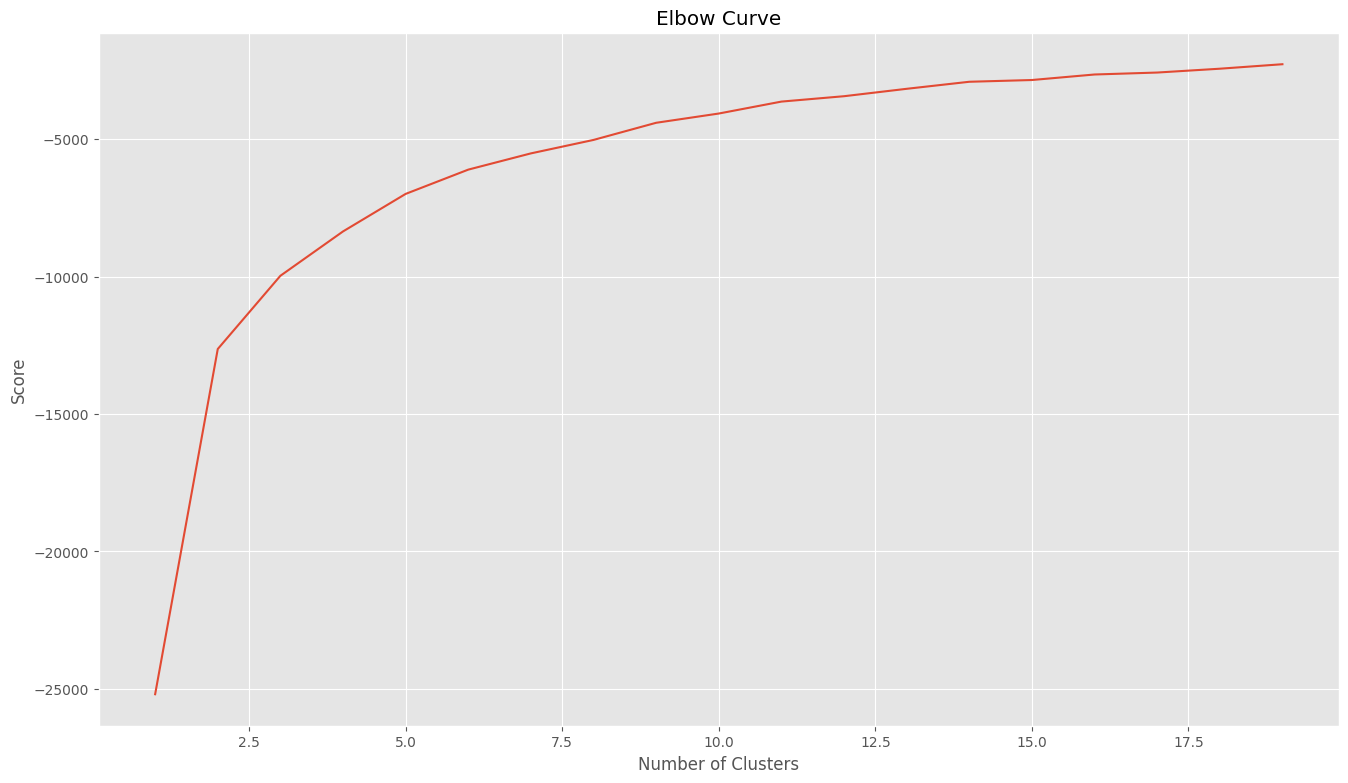

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
# Para el ejercicio, elijo 5 como un buen valor de K. Pero podría ser otro.
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[39.58792797 42.77579935 24.63679232]
 [43.42489342 32.20419121 19.27634421]
 [50.29293117 40.88830576 17.44525734]
 [35.66289621 48.44720497 34.125642  ]
 [59.42730336 30.78901593 16.13449193]]


In [ ]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

<Figure size 1600x900 with 0 Axes>

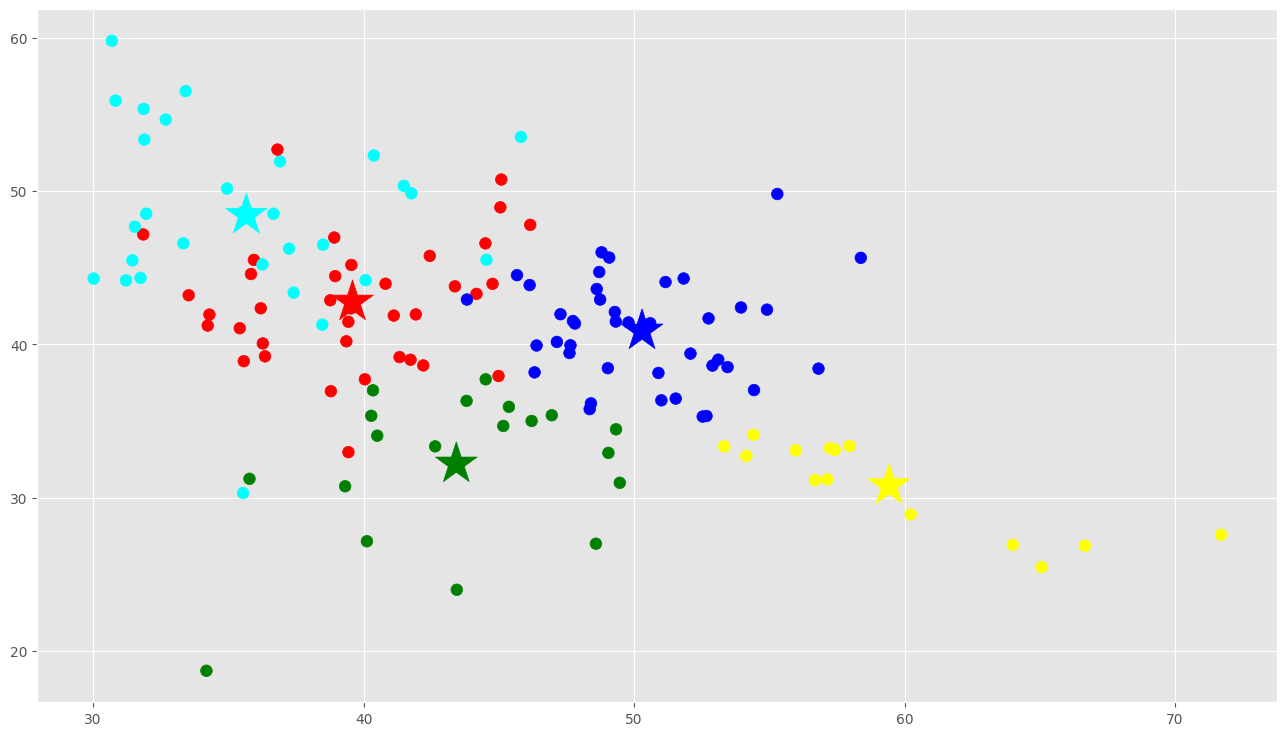

In [ ]:
# Hacemos una proyección a 2D con los diversos ejes
f1 = dataframe['op'].values
f2 = dataframe['ex'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

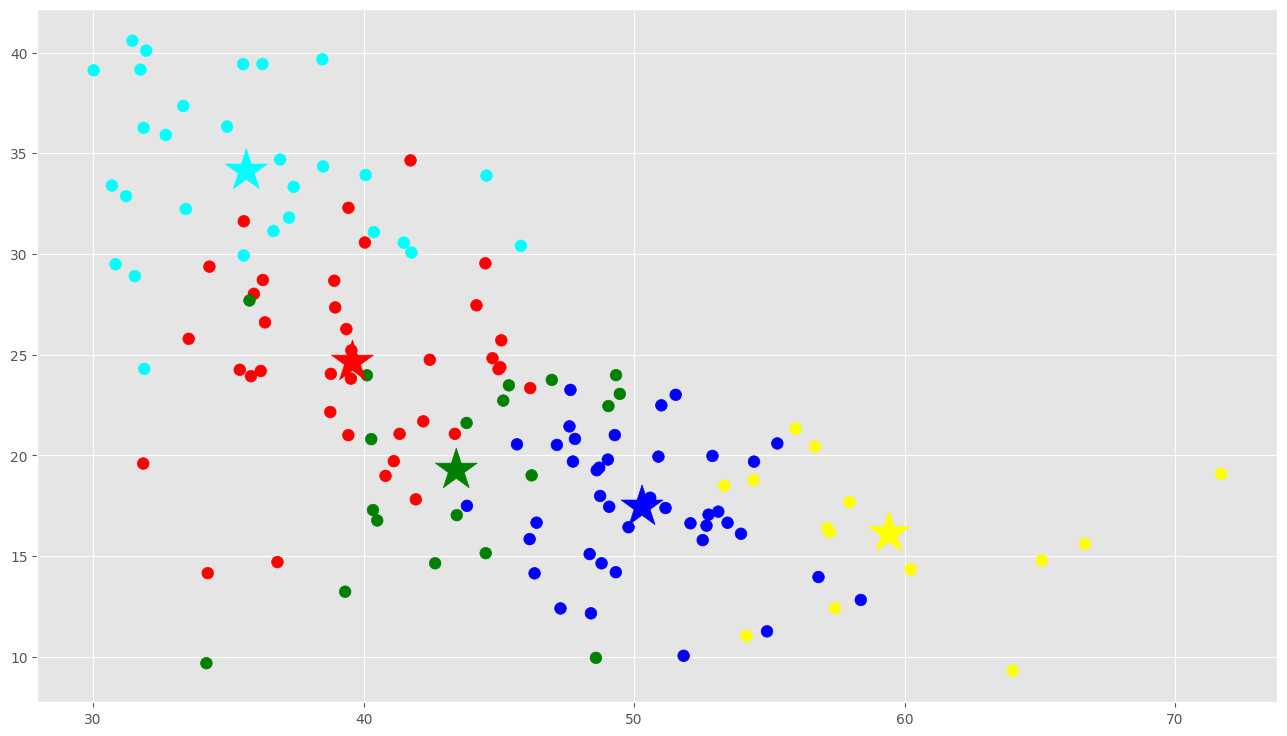

In [ ]:
# Hacemos una proyección a 2D con los diversos ejes
f1 = dataframe['op'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

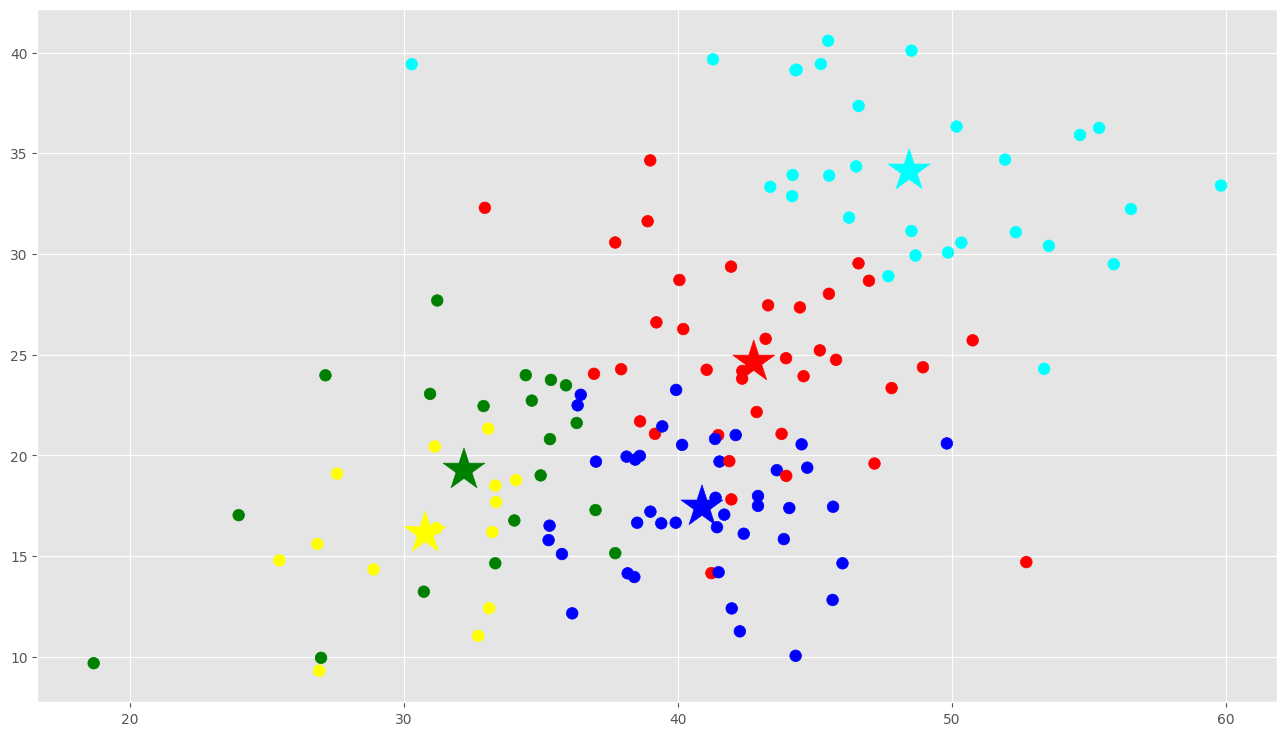

In [ ]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values

'''
# este codigo comentado agrega las categorias sobre cada punto
for label, x, y in zip(dataframe['categoria'].values, f1, f2):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
'''
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
# contamos cuantos usuarios hay en cada grupo
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,37
1,green,19
2,blue,41
3,cyan,29
4,yellow,14


In [ ]:
# Veamos cuantos usuarios en cada categoria hay en el grupo 0
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,3.0
2,2,4.0
3,3,1.0
4,4,3.0
5,5,NaN
6,6,5.0
7,7,11.0
8,8,8.0
9,9,2.0


In [ ]:
#imprimimos en pantalla los usuarios con categoria 2 del grupo
for index, row in group_referrals.iterrows():
    if row["categoria"] == 2:
        print (row["usuario"], row["categoria"],row["label"])

David_Busta 2 0
drexlerjorge 2 0
jtimberlake 2 0
pabloalboran 2 0


In [ ]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 64, 123,  21,  35,  82], dtype=int64)

In [ ]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

ierrejon
SJP
carmenelectra
DaniMateoAgain
JudgeJudy


In [ ]:
#miramos los usuarios del grupo 0
for index, row in copy.iterrows():
    if row["label"] == 0:
        print (row["usuario"], row["categoria"],row["label"])

3gerardpique 7 0
aguerosergiokun 7 0
albertochicote 4 0
alo_oficial 7 0
andresiniesta8 7 0
andy_murray 7 0
antoniobanderas 1 0
BarackObama 8 0
BillGates 6 0
CFKArgentina 8 0
charliesheen 1 0
ChristianG_7 4 0
Clyburn 8 0
David_Busta 2 0
DidacLee 6 0
drexlerjorge 2 0
edans 6 0
EdwardNorton 1 0
FernandezAnibal 8 0
fieritacatalano 6 0
hughlaurie 4 0
ierrejon 8 0
iescolar 9 0
JesusEncinar 6 0
jk_rowling 9 0
JohnKerry 8 0
jtimberlake 2 0
KAKA 7 0
KateUpton 3 0
lorenzo99 7 0
pabloalboran 2 0
Pablo_Iglesias_ 8 0
paugasol 7 0
RafaelNadal 7 0
sanchezcastejon 8 0
usainbolt 7 0
XabiAlonso 7 0


# Clasificación de nuevos registros

In [ ]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta personality traits
new_labels = kmeans.predict(X_new)
print(new_labels)

#NOTA: en el array podemos poner más de un array para evaluar a varios usuarios nuevos a la vez

NOTA FINAL: Los resultados obtenidos pueden varias de ejecución en ejecución pues al inicializar aleatoriamente los centroids, podemos obtener grupos distintos o los mismos pero en distinto orden y color